In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [5]:
df=pd.read_csv(r"C:\Users\grace\Downloads\car_age_price.csv")
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [7]:
df.shape

(112, 2)

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [6]:
df.columns = [col.strip().lower().replace(" ", "_") for col in df.columns]

# Let's check column names after renaming
df.columns

Index(['year', 'price'], dtype='object')

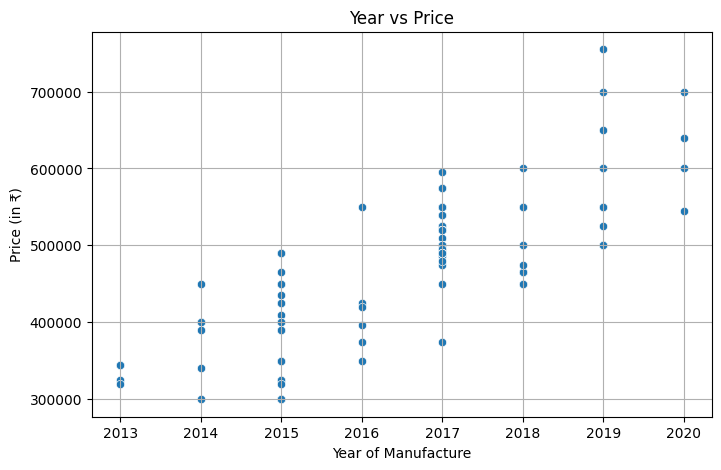

In [7]:
# Step 5: Plot the Data
plt.figure(figsize=(8, 5))
sns.scatterplot(x='year', y='price', data=df)
plt.title('Year vs Price')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price (in ₹)')
plt.grid(True)
plt.show()


In [9]:
# Step 6: Prepare Features and Target
X = df[['year']]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
## Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MSE: {mse_lr:.2f}")
print(f"Linear Regression R² Score: {r2_lr:.2f}")


Linear Regression MSE: 4326906256.83
Linear Regression R² Score: 0.37


In [11]:
## Lasso Regression Model
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)

# Predict and evaluate
y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression MSE: {mse_lasso:.2f}")
print(f"Lasso Regression R² Score: {r2_lasso:.2f}")


Lasso Regression MSE: 4326859771.02
Lasso Regression R² Score: 0.37


In [12]:
# Step 9: Predict Price of 2022 Model
year_2022 = pd.DataFrame({'year': [2022]})

price_lr = lr.predict(year_2022)[0]
price_lasso = lasso.predict(year_2022)[0]

print(f"Predicted price for 2022 (Linear Regression): ₹{price_lr:.2f}")
print(f"Predicted price for 2022 (Lasso Regression): ₹{price_lasso:.2f}")


Predicted price for 2022 (Linear Regression): ₹743601.62
Predicted price for 2022 (Lasso Regression): ₹743599.37


In [13]:
# Step 10: Conclusion
better_model = "Linear Regression" if r2_lr > r2_lasso else "Lasso Regression"
print(f"\nBetter performing model: {better_model}")



Better performing model: Lasso Regression


The Lasso Regression model performed slightly better than the Linear Regression model based on R² score and MSE.